# Задания

Скачайте и загрузите в память изображение.

1. Реализуйте метод, который добавляет Гауссовский шум на изображение `add_gauss_noise(image, mu=0, sigma=1)`. Выведите оригинальное и шумное изображения.  

2. Реализуйте метод, который добавляет "salt & pepper" шум на изображение `add_salt_pepper_noise(img)`. Выведите оригинальное и шумное изображения.  

3. Примените изученные и свои придуманные фильтры на изображениях с Гауссовским и "salt & pepper" шумами. Выведите изображение с шумом и отфильтрованное изображение.

4. Примените на изображении обычный и адаптивный метод выравнивания гистограммы (CLAHE). Выведите оригинальное и два результрующих изображения на экран. Нарисуйте гистограммы для всех изображений вместе с кумялятивной функцией распределения (CDF) (Tips: `cv2.equalizeHist`, `cv2.createCLAHE`). Опишите полученный результат.


# Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 0

In [2]:
!mkdir -p img
!wget "https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg" -O img/doggo.jpg

--2020-12-28 20:56:53--  https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg
Resolving 4pawsins.com (4pawsins.com)... 67.227.187.15
Connecting to 4pawsins.com (4pawsins.com)|67.227.187.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608076 (594K) [image/jpeg]
Saving to: ‘img/doggo.jpg’

img/doggo.jpg       100%[===================>] 593.82K  1.35MB/s    in 0.4s    

2020-12-28 20:56:54 (1.35 MB/s) - ‘img/doggo.jpg’ saved [608076/608076]



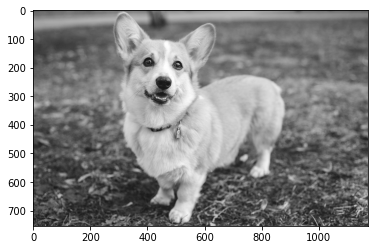

In [3]:
img = cv2.imread('img/doggo.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.show()

# Task 1

In [4]:
def add_gauss_noise(img, mu=0, sigma=1):
  row, col = img.shape
  gauss = np.random.normal(mu, sigma, (row, col))
  gauss = gauss.reshape(row, col)
  return (img + gauss).astype(np.uint8)

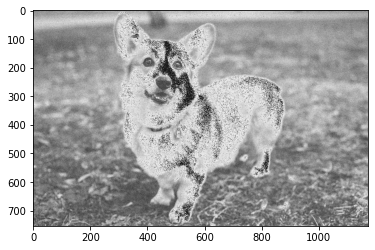

In [5]:
img_gauss = add_gauss_noise(img, 32, 16)

plt.imshow(img_gauss, cmap='gray')
plt.show()

# Task 2

In [6]:
def add_salt_pepper_noise(img, ratio=0.5, amount=0.1):
  row, col = img.shape
  salt_n = np.ceil(img.size * amount * ratio)
  pepper_n = np.ceil(img.size * amount * (1. - ratio))
  salt_p = []
  pepper_p = []
  for i in img.shape:
    salt_p.append(np.random.randint(0, i - 1, int(salt_n)))
    pepper_p.append(np.random.randint(0, i - 1, int(pepper_n)))
  result = np.copy(img)
  result[tuple(salt_p)] = 1
  result[tuple(pepper_p)] = 0
  return result

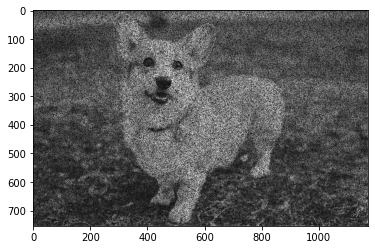

In [7]:
img_salt_pepper = add_salt_pepper_noise(img, 0.5, 0.5)

plt.imshow(img_salt_pepper, cmap='gray')
plt.show()

# Task 3

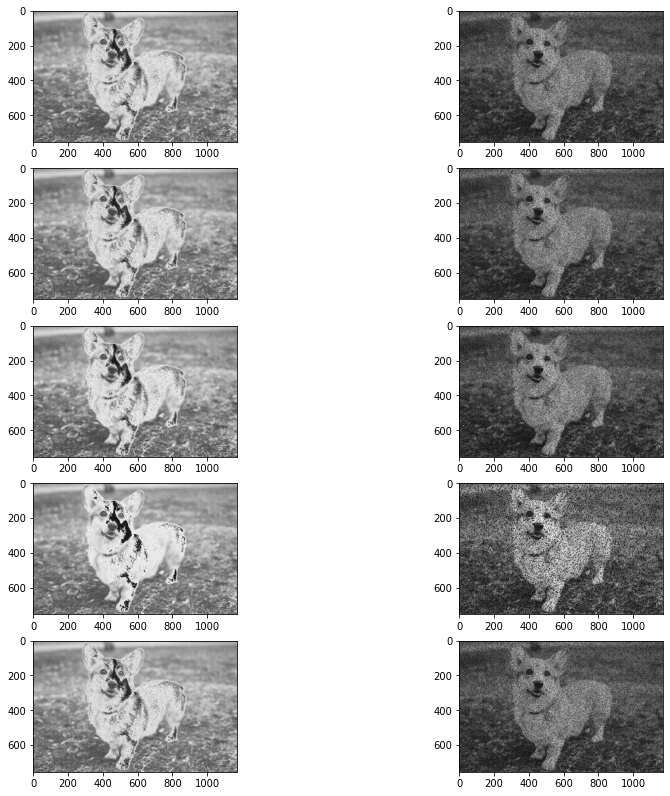

In [8]:
IMG = [img_gauss, img_salt_pepper]
images = len(IMG)
filters = 5

fig=plt.figure(figsize=(14, 14))
for i in range(images):
  index = list(range(i + 1, 11, 2))
  fig.add_subplot(filters, images, index[0])
  img_mean = cv2.filter2D(src=IMG[i], ddepth=-1, kernel=(np.ones((3, 3), np.float32) / 9))
  plt.imshow(img_mean, cmap='gray')

  fig.add_subplot(filters, images, index[1])
  img_box = cv2.boxFilter(src=IMG[i], ddepth=-1, ksize=(3, 3))
  plt.imshow(img_box, cmap='gray')

  fig.add_subplot(filters, images, index[2])
  img_blurred = cv2.GaussianBlur(IMG[i], (5, 5), 0)
  plt.imshow(img_blurred, cmap='gray')

  fig.add_subplot(filters, images, index[3])
  img_median = cv2.medianBlur(IMG[i], 3)
  plt.imshow(img_median, cmap='gray')

  fig.add_subplot(filters, images, index[4])
  img_bilateral = cv2.bilateralFilter(IMG[i], 3, 75, 75)
  plt.imshow(img_bilateral, cmap='gray')

plt.show()

# Task 4

In [9]:
def plot_hist_cdf(img):
  # compute histogram for the image
  hist, bins = np.histogram(img.flatten(), 256, [0,256])  
  # compute CDF from histogram
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()  
  # plt.figure(figsize=(20, 12))
  plt.plot(cdf_normalized, color = 'b')
  plt.hist(img.flatten() ,256, [0, 256], color = 'r')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')

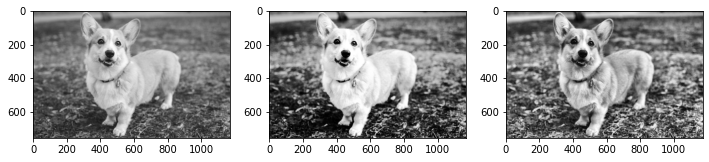

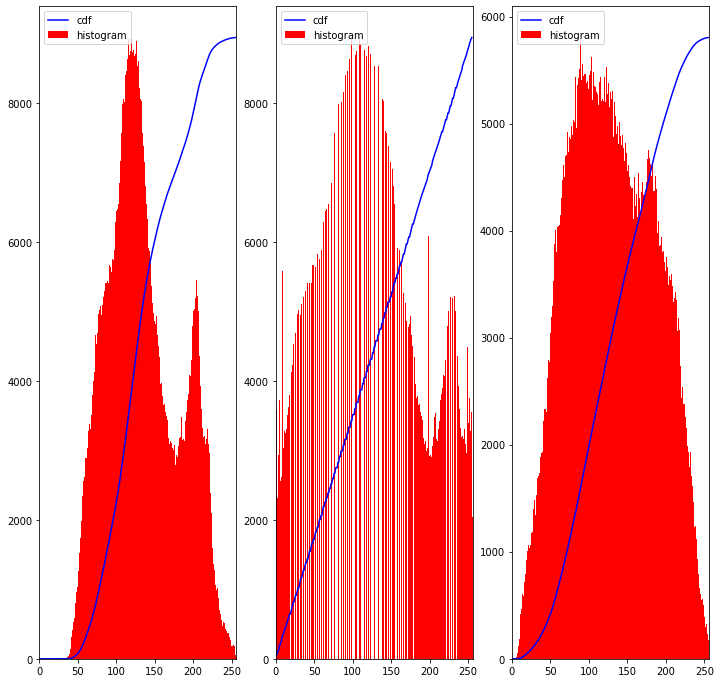

In [10]:
img_equalized = cv2.equalizeHist(img)

obj_clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = obj_clahe.apply(img)

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

fig.add_subplot(1, 3, 2)
plt.imshow(img_equalized, cmap='gray')

fig.add_subplot(1, 3, 3)
plt.imshow(img_clahe, cmap='gray')

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(1, 3, 1)
plot_hist_cdf(img)

fig.add_subplot(1, 3, 2)
plot_hist_cdf(img_equalized)

fig.add_subplot(1, 3, 3)
plot_hist_cdf(img_clahe)

By the definition, histogram equalization is a transformation function which maps the input pixels in brighter region to output pixels in full region.

The second column plots shows the results for the cv2.equalizeHist function.
As we can see, it considers the global contrast of the image and simply expands (stretches) the base histogram values to the full color region, keeping proportions, but omitting some intermediate colors of the spectrum. And from the practical perspective - it just overexposes the foreground object.

While the cv2.createCLAHE function, shown in the third column, considers not only global contrast, but some local regions ("tiles") contrasts and equalizes them as usual. And we can see the solid histogram instead of fragmented.